In [7]:
import sys 
sys.path.append('..')

In [8]:
import electrode2currentmap as e2cm
from importlib import reload
reload(e2cm)

<module 'electrode2currentmap' from '../electrode2currentmap.py'>

In [9]:
r = e2cm.Retina(axon_map='axon.npz')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

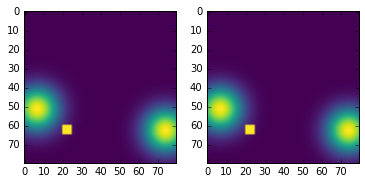

In [11]:
# made-up current map
xg = e2cm.micron2deg(r.gridx)
yg = e2cm.micron2deg(r.gridy)

cm = np.exp(-((xg-1)**2+(yg+3)**2)/1)
cm[60:65,20:25]= 1

cm[50:60,80:90]= 1
cm = cm + np.exp(-((xg-2)**2+(yg-3)**2)/1)

# show the currrent map as an image
plt.subplot(1,2,1)
plt.imshow(cm,cmap = 'viridis')

# pass the current map through the axon map
ecm = r.cm2ecm(cm)
plt.subplot(1,2,2)
plt.imshow(ecm, cmap = 'viridis')
